This script summarizes and visualizes the missing link prediction feature importance results across the food web database. 

Requires the following results folders: 'Results_Food_Webs_0', 'Results_Food_Webs_1', 'Results_Food_Webs_2', 'Results_Food_Webs_3', 'Results_Food_Webs_4'

Note this was run with Python 3.12.4, numpy 1.26.4, matplotlib 3.8.4, pandas 2.2.2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import pickle
import pandas as pd
import string
processing_folder = 'Data_Processing_Code_Disaggregated_Lifestage'
# These results correspond to those on Processed_Data_Disaggregated_Lifestage, Processed_Data_Disaggregated_Lifestage_1, 
# Processed_Data_Disaggregated_Lifestage_2, Processed_Data_Disaggregated_Lifestage_3, Processed_Data_Disaggregated_Lifestage_4
res_folders = ['Results_Food_Webs_0', 'Results_Food_Webs_1', 'Results_Food_Webs_2', 'Results_Food_Webs_3', 'Results_Food_Webs_4']
full_color = 'chocolate'
struc_color = 'olivedrab'
attr_color = 'cadetblue'
with open(os.path.join(processing_folder,'fw_metadata.pickle'), 'rb') as handle:
    fw_metadata = pickle.load(handle)
from summarize_results_food_webs import enumerate_importance
from summarize_results_food_webs import visualize_importance
from matplotlib.lines import Line2D
    
import matplotlib.font_manager as font_manager
font_dir = ['../../Helvetica']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
plt.rcParams['font.family'] = 'Helvetica'
FONT_SIZE1 = 32 # Main text, one column
FONT_SIZE2 = 17
display_names = pd.read_csv('feature_display_names.csv')
display_dict = dict(zip(list(display_names['feat']), list(display_names['display'])))

import warnings
warnings.filterwarnings('ignore')

In [2]:
enumerate_importance('gini' , [], 'all', res_folders)

feature  importance
4       KNN-out-D4    0.074751
12      KNN-out-D1    0.054574
1       KNN-out-D6    0.051838
0        KNN-in-D5    0.049647
13      KNN-out-D2    0.047647
2              EPA    0.046162
9       KNN-out-D5    0.040979
52      KNN-out-D3    0.035205
15       KNN-in-D4    0.032165
3       LRA-approx    0.029214
30  log_mass_ratio    0.024483
10            PRDj    0.022958
8             CCIj    0.021794
11            KCIj    0.021532
5             DCIj    0.021441
19       KNN-in-D6    0.018102
6      dLRA-approx    0.017044
61       KNN-in-D1    0.014699
16            CCOi    0.013652
54            ECIj    0.013479

['KNN-out-D4',
 'KNN-out-D1',
 'KNN-out-D6',
 'KNN-in-D5',
 'KNN-out-D2',
 'EPA',
 'KNN-out-D5',
 'KNN-out-D3',
 'KNN-in-D4',
 'LRA-approx']

In [3]:
enumerate_importance('perm', [], 'all', res_folders)

feature  importance
3        KNN-out-D4    0.003059
1        KNN-out-D6    0.001702
0         KNN-in-D5    0.001691
85              EPA    0.001050
2        LRA-approx    0.001041
41   log_mass_ratio    0.000610
72       KNN-out-D5    0.000433
9         KNN-in-D6    0.000324
77      dLRA-approx    0.000309
81        KNN-in-D4    0.000284
66  dot_product_num    0.000268
5       dot_product    0.000228
59    manhattan_num    0.000207
12       log_mass_i    0.000155
6             LCCDi    0.000150
4     euclidean_num    0.000145
44        KNN-in-D1    0.000132
10            ANDOi    0.000126
16        KNN-in-D2    0.000113
8            cosine    0.000111

['KNN-out-D4',
 'KNN-out-D6',
 'KNN-in-D5',
 'EPA',
 'LRA-approx',
 'log_mass_ratio',
 'KNN-out-D5',
 'KNN-in-D6',
 'dLRA-approx',
 'KNN-in-D4']

In [4]:
type_ids_skip = {}
for eco_type in ['lakes', 'terrestrial belowground','marine','streams','terrestrial aboveground']:
    ids_to_skip = []
    for fw in fw_metadata:
        if fw_metadata[fw]['ecosystem.type'] != eco_type:
            fw_id = str(fw_metadata[fw]['fw_id'])
            if fw_id not in ids_to_skip:
                ids_to_skip.append(int(fw_id))
    print(f"Ecosystem Type: {eco_type}")
    print(f"Ids to skip: {ids_to_skip}")
    type_ids_skip[eco_type] = ids_to_skip

Ecosystem Type: lakes
Ids to skip: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 108, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 26

In [5]:
# Marine
top10_marine_gini = enumerate_importance('gini',type_ids_skip['marine'],'marine',res_folders)
print(f"top 10 marine gini: {top10_marine_gini}")
top10_marine_perm = enumerate_importance('perm',type_ids_skip['marine'],'marine',res_folders)
print(f"top 10 marine perm: {top10_marine_perm}")

feature  importance
3       KNN-out-D4    0.075973
1              EPA    0.056014
20      KNN-out-D1    0.049856
2        KNN-in-D4    0.046784
69      KNN-out-D6    0.042482
9       KNN-out-D2    0.041309
77      KNN-out-D3    0.040870
45      KNN-out-D5    0.039866
12       KNN-in-D5    0.039267
43  log_mass_ratio    0.028316
18            CCIj    0.020527
16            PRDj    0.020507
6        KNN-in-D1    0.020482
14       KNN-in-D6    0.020317
15            KCIj    0.019483
21       KNN-in-D2    0.018592
23       KNN-in-D3    0.017980
7             CCOi    0.017286
22            DCIj    0.016581
0             KCOi    0.015189

top 10 marine gini: ['KNN-out-D4', 'EPA', 'KNN-out-D1', 'KNN-in-D4', 'KNN-out-D6', 'KNN-out-D2', 'KNN-out-D3', 'KNN-out-D5', 'KNN-in-D5', 'log_mass_ratio']


feature  importance
2        KNN-out-D4    0.001739
59       KNN-out-D6    0.001131
11        KNN-in-D5    0.001095
87   log_mass_ratio    0.000903
93              EPA    0.000817
1        LRA-approx    0.000751
30  dot_product_num    0.000426
38      dLRA-approx    0.000406
13    manhattan_num    0.000393
4         KNN-in-D4    0.000379
86      dot_product    0.000359
26    euclidean_num    0.000300
3         KNN-in-D6    0.000274
79            LCCDi    0.000253
80           cosine    0.000232
91            ANDOi    0.000227
74        euclidean    0.000222
32        KNN-in-D1    0.000184
85       log_mass_j    0.000181
68        manhattan    0.000181

top 10 marine perm: ['KNN-out-D4', 'KNN-out-D6', 'KNN-in-D5', 'log_mass_ratio', 'EPA', 'LRA-approx', 'dot_product_num', 'dLRA-approx', 'manhattan_num', 'KNN-in-D4']


In [6]:
# Streams
top10_streams_gini = enumerate_importance('gini',type_ids_skip['streams'],'streams',res_folders)
print(f"top 10 streams gini: {top10_streams_gini}")
top10_streams_perm = enumerate_importance('perm',type_ids_skip['streams'],'streams',res_folders)
print(f"top 10 streams perm: {top10_streams_perm}")

feature  importance
2       KNN-out-D4    0.106945
0       KNN-out-D5    0.070859
12             EPA    0.053573
41       KNN-in-D5    0.050813
1       KNN-out-D6    0.049284
7       KNN-out-D3    0.045155
3       KNN-out-D1    0.042983
5       KNN-out-D2    0.042008
15       KNN-in-D4    0.038716
4             KCIj    0.033931
22            PRDj    0.031674
9             DCIj    0.031485
25            CCIj    0.026114
21      LRA-approx    0.025181
6   log_mass_ratio    0.021414
13            ECIj    0.019230
42       trophic-j    0.018277
77       KNN-in-D6    0.015622
35      log_mass_j    0.013487
37       KNN-in-D3    0.012216

top 10 streams gini: ['KNN-out-D4', 'KNN-out-D5', 'EPA', 'KNN-in-D5', 'KNN-out-D6', 'KNN-out-D3', 'KNN-out-D1', 'KNN-out-D2', 'KNN-in-D4', 'KCIj']


feature  importance
68              EPA    0.007156
89       KNN-out-D4    0.005828
23        KNN-in-D5    0.001367
0        KNN-out-D6    0.001301
74       LRA-approx    0.000504
78      dLRA-approx    0.000193
9         KNN-in-D4    0.000123
86  dot_product_num    0.000115
56           DSPBCj    0.000112
54              LCj    0.000112
16            LNTDi    0.000088
81   log_mass_ratio    0.000084
73    manhattan_num    0.000081
66            LCCDi    0.000073
64            LCCDj    0.000070
1              DCIi    0.000070
8              PRDi    0.000066
7              CCIi    0.000064
6              KCIi    0.000062
83        KNN-in-D1    0.000060

top 10 streams perm: ['EPA', 'KNN-out-D4', 'KNN-in-D5', 'KNN-out-D6', 'LRA-approx', 'dLRA-approx', 'KNN-in-D4', 'dot_product_num', 'DSPBCj', 'LCj']


In [7]:
# Lakes
top10_lakes_gini = enumerate_importance('gini',type_ids_skip['lakes'],'lakes',res_folders)
print(f"top 10 lakes gini: {top10_lakes_gini}")
top10_lakes_perm = enumerate_importance('perm',type_ids_skip['lakes'],'lakes',res_folders)
print(f"top 10 lakes perm: {top10_lakes_perm}")

feature  importance
0       KNN-out-D4    0.097028
3       KNN-out-D1    0.061042
11      KNN-out-D2    0.054218
5       KNN-out-D5    0.051769
12      KNN-out-D3    0.048184
9        KNN-in-D5    0.043442
38      KNN-out-D6    0.037874
1             DCIj    0.035086
16             EPA    0.034983
7             PRDj    0.034501
4             CCIj    0.027961
17  log_mass_ratio    0.027503
2             KCIj    0.027446
6       log_mass_j    0.025184
25       KNN-in-D4    0.021765
13            ECIj    0.020334
90   mov_sessile_j    0.016581
43      LRA-approx    0.015009
52       trophic-j    0.014756
46       KNN-in-D1    0.014278

top 10 lakes gini: ['KNN-out-D4', 'KNN-out-D1', 'KNN-out-D2', 'KNN-out-D5', 'KNN-out-D3', 'KNN-in-D5', 'KNN-out-D6', 'DCIj', 'EPA', 'PRDj']


feature  importance
87       KNN-out-D4    0.006415
80        KNN-in-D5    0.002093
84       KNN-out-D5    0.000836
7        KNN-out-D6    0.000713
62   log_mass_ratio    0.000444
6         KNN-in-D4    0.000419
58      dot_product    0.000307
63      dLRA-approx    0.000275
1        LRA-approx    0.000242
13        manhattan    0.000234
65  dot_product_num    0.000226
78       KNN-out-D2    0.000216
71           cosine    0.000188
69    manhattan_num    0.000179
70        euclidean    0.000178
68              EPA    0.000176
51        KNN-in-D6    0.000150
55       log_mass_i    0.000145
56    euclidean_num    0.000145
81       log_mass_j    0.000110

top 10 lakes perm: ['KNN-out-D4', 'KNN-in-D5', 'KNN-out-D5', 'KNN-out-D6', 'log_mass_ratio', 'KNN-in-D4', 'dot_product', 'dLRA-approx', 'LRA-approx', 'manhattan']


In [8]:
# Terrestrial aboveground
top10_terrestrialabove_gini = enumerate_importance('gini',type_ids_skip['terrestrial aboveground'],'terrestrial_above',res_folders)
print(f"top 10 terrestrial aboveground gini: {top10_terrestrialabove_gini}")
top10_terrestrialabove_perm = enumerate_importance('perm',type_ids_skip['terrestrial aboveground'],'terrestrial_above',res_folders)
print(f"top 10 terrestrial aboveground perm: {top10_terrestrialabove_perm}")

feature  importance
0     KNN-in-D5    0.070096
1    KNN-out-D6    0.067741
4    KNN-out-D4    0.066255
3    LRA-approx    0.056997
2           EPA    0.051719
9    KNN-out-D5    0.042247
12   KNN-out-D1    0.031282
13   KNN-out-D2    0.030127
11         KCIj    0.029708
8          CCIj    0.029464
10         PRDj    0.028617
6   dLRA-approx    0.027858
5          DCIj    0.027184
19    KNN-in-D6    0.023299
15    KNN-in-D4    0.019569
52   KNN-out-D3    0.018806
7     trophic-j    0.018271
38   log_mass_j    0.014570
54         ECIj    0.013516
18         KCOi    0.013484

top 10 terrestrial aboveground gini: ['KNN-in-D5', 'KNN-out-D6', 'KNN-out-D4', 'LRA-approx', 'EPA', 'KNN-out-D5', 'KNN-out-D1', 'KNN-out-D2', 'KCIj', 'CCIj']


feature  importance
1        KNN-out-D6    0.006838
0         KNN-in-D5    0.006492
2        LRA-approx    0.004337
3        KNN-out-D4    0.003470
72       KNN-out-D5    0.001509
9         KNN-in-D6    0.000727
51       KNN-out-D2    0.000588
15       KNN-out-D1    0.000495
77      dLRA-approx    0.000444
5       dot_product    0.000199
66  dot_product_num    0.000198
41   log_mass_ratio    0.000161
59    manhattan_num    0.000136
81        KNN-in-D4    0.000120
54        manhattan    0.000114
39        euclidean    0.000109
6             LCCDi    0.000105
10            ANDOi    0.000099
8            cosine    0.000090
44        KNN-in-D1    0.000087

top 10 terrestrial aboveground perm: ['KNN-out-D6', 'KNN-in-D5', 'LRA-approx', 'KNN-out-D4', 'KNN-out-D5', 'KNN-in-D6', 'KNN-out-D2', 'KNN-out-D1', 'dLRA-approx', 'dot_product']


In [9]:
# Terrestrial belowground
top10_terrestrialbelow_gini = enumerate_importance('gini',type_ids_skip['terrestrial belowground'],'terrestrial_below',res_folders)
print(f"top 10 terrestrial belowground gini: {top10_terrestrialbelow_gini}")
top10_terrestrialbelow_perm = enumerate_importance('perm',type_ids_skip['terrestrial belowground'],'terrestrial_below',res_folders)
print(f"top 10 terrestrial belowground perm: {top10_terrestrialbelow_perm}")

feature  importance
0       KNN-out-D6    0.085668
2       KNN-out-D1    0.075537
1        KNN-in-D5    0.074073
3       LRA-approx    0.072095
4       KNN-out-D2    0.067140
8      dLRA-approx    0.040295
6       KNN-out-D4    0.034138
14             DSP    0.028441
10             EPA    0.026361
7              EAA    0.022649
11             EJC    0.022522
5              ERA    0.019746
12            ELHN    0.019458
30            PPRD    0.019135
16       KNN-in-D6    0.018861
9   log_mass_ratio    0.017827
13       euclidean    0.016325
20   manhattan_num    0.016077
21      KNN-out-D5    0.015832
18       manhattan    0.015770

top 10 terrestrial belowground gini: ['KNN-out-D6', 'KNN-out-D1', 'KNN-in-D5', 'LRA-approx', 'KNN-out-D2', 'dLRA-approx', 'KNN-out-D4', 'DSP', 'EPA', 'EAA']


feature  importance
0           KNN-out-D6    0.002362
89          LRA-approx    0.001591
85          KNN-out-D4    0.001253
81           KNN-in-D5    0.001036
4           KNN-out-D5    0.000814
54           KNN-in-D6    0.000621
93      met_detritus_i    0.000564
91      log_mass_ratio    0.000492
87          KNN-out-D1    0.000323
82          log_mass_i    0.000307
79          KNN-out-D2    0.000166
49           ECN-score    0.000142
37      mass_missing_i    0.000138
47                CCOi    0.000119
43               LCCDj    0.000114
10         mLRA-approx    0.000111
56         dLRA-approx    0.000100
60  met_invertebrate_i    0.000098
34           KNN-in-D1    0.000098
70       mov_walking_i    0.000094

top 10 terrestrial belowground perm: ['KNN-out-D6', 'LRA-approx', 'KNN-out-D4', 'KNN-in-D5', 'KNN-out-D5', 'KNN-in-D6', 'met_detritus_i', 'log_mass_ratio', 'KNN-out-D1', 'log_mass_i']


In [10]:
# Get the union of the top 10 features across all 5 ecosystem types - GINI 
gini_all = top10_marine_gini + top10_streams_gini + top10_lakes_gini + top10_terrestrialabove_gini + top10_terrestrialbelow_gini
print(gini_all)
gini_unique = list(set(gini_all))
print(gini_unique)
print(len(gini_unique))

['KNN-out-D4', 'EPA', 'KNN-out-D1', 'KNN-in-D4', 'KNN-out-D6', 'KNN-out-D2', 'KNN-out-D3', 'KNN-out-D5', 'KNN-in-D5', 'log_mass_ratio', 'KNN-out-D4', 'KNN-out-D5', 'EPA', 'KNN-in-D5', 'KNN-out-D6', 'KNN-out-D3', 'KNN-out-D1', 'KNN-out-D2', 'KNN-in-D4', 'KCIj', 'KNN-out-D4', 'KNN-out-D1', 'KNN-out-D2', 'KNN-out-D5', 'KNN-out-D3', 'KNN-in-D5', 'KNN-out-D6', 'DCIj', 'EPA', 'PRDj', 'KNN-in-D5', 'KNN-out-D6', 'KNN-out-D4', 'LRA-approx', 'EPA', 'KNN-out-D5', 'KNN-out-D1', 'KNN-out-D2', 'KCIj', 'CCIj', 'KNN-out-D6', 'KNN-out-D1', 'KNN-in-D5', 'LRA-approx', 'KNN-out-D2', 'dLRA-approx', 'KNN-out-D4', 'DSP', 'EPA', 'EAA']
['KNN-out-D2', 'LRA-approx', 'KCIj', 'CCIj', 'DCIj', 'PRDj', 'DSP', 'log_mass_ratio', 'KNN-out-D6', 'KNN-out-D1', 'KNN-in-D4', 'EPA', 'KNN-in-D5', 'KNN-out-D5', 'EAA', 'KNN-out-D3', 'dLRA-approx', 'KNN-out-D4']
18


In [11]:
# Get the union of the top 10 features across all 5 ecosystem types - perm 
perm_all = top10_marine_perm + top10_streams_perm + top10_lakes_perm + top10_terrestrialabove_perm + top10_terrestrialbelow_perm
print(perm_all)
perm_unique = list(set(perm_all))
print(perm_unique)
print(len(perm_unique))

['KNN-out-D4', 'KNN-out-D6', 'KNN-in-D5', 'log_mass_ratio', 'EPA', 'LRA-approx', 'dot_product_num', 'dLRA-approx', 'manhattan_num', 'KNN-in-D4', 'EPA', 'KNN-out-D4', 'KNN-in-D5', 'KNN-out-D6', 'LRA-approx', 'dLRA-approx', 'KNN-in-D4', 'dot_product_num', 'DSPBCj', 'LCj', 'KNN-out-D4', 'KNN-in-D5', 'KNN-out-D5', 'KNN-out-D6', 'log_mass_ratio', 'KNN-in-D4', 'dot_product', 'dLRA-approx', 'LRA-approx', 'manhattan', 'KNN-out-D6', 'KNN-in-D5', 'LRA-approx', 'KNN-out-D4', 'KNN-out-D5', 'KNN-in-D6', 'KNN-out-D2', 'KNN-out-D1', 'dLRA-approx', 'dot_product', 'KNN-out-D6', 'LRA-approx', 'KNN-out-D4', 'KNN-in-D5', 'KNN-out-D5', 'KNN-in-D6', 'met_detritus_i', 'log_mass_ratio', 'KNN-out-D1', 'log_mass_i']
['LRA-approx', 'KNN-out-D5', 'KNN-in-D6', 'manhattan_num', 'EPA', 'KNN-in-D5', 'met_detritus_i', 'manhattan', 'dot_product_num', 'LCj', 'KNN-in-D4', 'DSPBCj', 'dot_product', 'KNN-out-D2', 'log_mass_ratio', 'KNN-out-D6', 'KNN-out-D1', 'log_mass_i', 'dLRA-approx', 'KNN-out-D4']
20


In [12]:
# Key for feature type categorizations -- just hard coding this
structure_features = ['LNTDi','LNTDj','trophic-i','trophic-j', 'PPRD', 'PRDi', 'PRDj', 'DSPBCi',\
                        'DSPBCj', 'LCi', 'LCj', 'LRA', 'dLRA','mLRA','LRA-approx','dLRA-approx',\
                        'mLRA-approx','DSP', 'ANDIi', 'ANDIj', 'ANDOi', 'ANDOj', 'ECIi', 'ECIj',\
                        'ECOi','ECOj','DCIi','DCIj','DCOi','DCOj','CCIi','CCIj','CCOi','CCOj','KCIi',\
                        'KCIj','KCOi','KCOj','EPA','LCCDi','LCCDj','ECN','ECN-score','ELHN','EJC','ERA',\
                        'EAA','KNN-in-D5','KNN-out-D5','KNN-in-D6','KNN-out-D6']
full_features = ['KNN-in-D1','KNN-out-D1','KNN-in-D2','KNN-out-D2',\
                'KNN-in-D3','KNN-out-D3','KNN-in-D4','KNN-out-D4']
print(f"number of structure features: {len(structure_features)}")
print(f"number of full-only features: {len(full_features)}")
feature_types = {}
for feat in structure_features:
    feature_types[feat] = "structure"
for feat in full_features:
    feature_types[feat] = "full"

number of structure features: 51
number of full-only features: 8


In [13]:
# Overall Gini importance (main text figure)
figure(figsize=(6, 15), dpi=1000)
visualize_importance(os.path.join('Summarized_Results',f'feature_importance_gini_aggregated_all_overall.csv'),gini_unique,'Gini importance',\
                     20,True,None,FONT_SIZE1,[0.0022,0.002,0.0022],-0.35,True,True,500,full_color,struc_color,attr_color,feature_types,display_dict)
plt.savefig(f'Figures/feature_importance_Gini_overall.pdf', bbox_inches='tight')
plt.show()

feature  importance
0       KNN-out-D4    0.074751
1       KNN-out-D1    0.054574
2       KNN-out-D6    0.051838
3        KNN-in-D5    0.049647
4       KNN-out-D2    0.047647
5              EPA    0.046162
6       KNN-out-D5    0.040979
7       KNN-out-D3    0.035205
8        KNN-in-D4    0.032165
9       LRA-approx    0.029214
10  log_mass_ratio    0.024483
11            PRDj    0.022958
12            CCIj    0.021794
13            KCIj    0.021532
14            DCIj    0.021441
16     dLRA-approx    0.017044
36             DSP    0.007046
41             EAA    0.005787

In [14]:
# Overall permutation importance
figure(figsize=(6, 15), dpi=1000)
visualize_importance(os.path.join('Summarized_Results',f'feature_importance_perm_aggregated_all_overall.csv'),perm_unique,'Permutation importance',\
                     20,True,None,FONT_SIZE1,[0,0,0],-0.4,True,True,500,full_color,struc_color,attr_color,feature_types,display_dict)
plt.savefig(f'Figures/feature_importance_Perm_overall.pdf', bbox_inches='tight')
plt.show()

feature  importance
0        KNN-out-D4    0.003059
1        KNN-out-D6    0.001702
2         KNN-in-D5    0.001691
3               EPA    0.001050
4        LRA-approx    0.001041
5    log_mass_ratio    0.000610
6        KNN-out-D5    0.000433
7         KNN-in-D6    0.000324
8       dLRA-approx    0.000309
9         KNN-in-D4    0.000284
10  dot_product_num    0.000268
11      dot_product    0.000228
12    manhattan_num    0.000207
13       log_mass_i    0.000155
25        manhattan    0.000097
27       KNN-out-D1    0.000080
35       KNN-out-D2    0.000053
36           DSPBCj    0.000049
39              LCj    0.000043
40   met_detritus_i    0.000042

106


feature  importance
0                     KNN-out-D4    0.074751
1                     KNN-out-D1    0.054574
2                     KNN-out-D6    0.051838
3                      KNN-in-D5    0.049647
4                     KNN-out-D2    0.047647
..                           ...         ...
101        mov_other_nonliving_j    0.000017
102  met_dead_organic_material_j    0.000008
103                  met_other_j    0.000001
104                   cosine_num    0.000000
105                          LRA    0.000000

[106 rows x 2 columns]

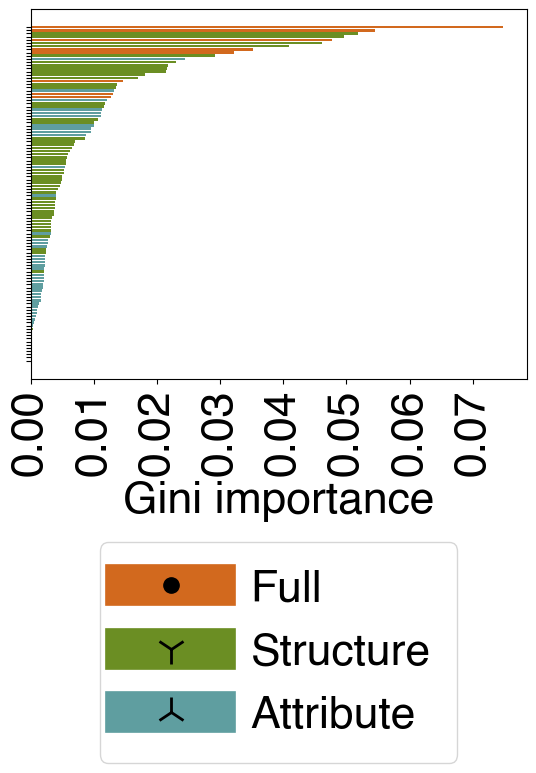

feature  importance
0                    KNN-out-D4    0.003059
1                    KNN-out-D6    0.001702
2                     KNN-in-D5    0.001691
3                           EPA    0.001050
4                    LRA-approx    0.001041
..                          ...         ...
101  met_endotherm_vertebrate_j   -0.000108
102                        PRDj   -0.000128
103                        CCIj   -0.000154
104                        DCIj   -0.000192
105                        KCIj   -0.000211

[106 rows x 2 columns]

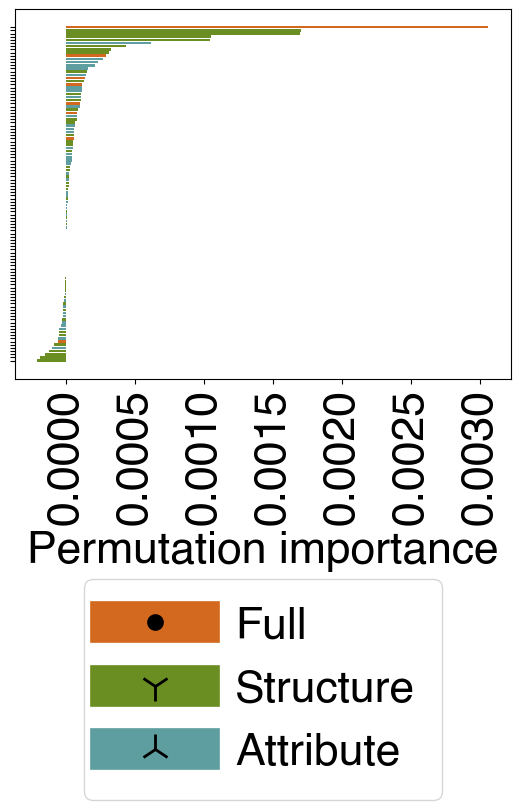

In [15]:
# Feature set should be all of them
all_feats = list(pd.read_csv(os.path.join('Summarized_Results','feature_importance_gini_aggregated_all_overall.csv'))['feature'])
print(len(all_feats))
visualize_importance(os.path.join('Summarized_Results',f'feature_importance_gini_aggregated_all_overall.csv'),\
                     all_feats, 'Gini importance', False, False, None, FONT_SIZE1, None,-1.1,False,True,None,full_color,\
                     struc_color,attr_color,feature_types,display_dict)
plt.savefig(f'Figures/feature_importance_Gini_overall_ALL.pdf', bbox_inches='tight')
plt.show()
visualize_importance(os.path.join('Summarized_Results',f'feature_importance_perm_aggregated_all_overall.csv'),\
                     all_feats, 'Permutation importance', False, False, None, FONT_SIZE1, None,-1.2,False,True,None,full_color,struc_color,\
                     attr_color,feature_types,display_dict)
plt.savefig(f'Figures/feature_importance_Perm_overall_ALL.pdf', bbox_inches='tight')
plt.show()

feature  importance
0                   KNN-out-D4    0.097028
1                   KNN-out-D1    0.061042
2                   KNN-out-D2    0.054218
3                   KNN-out-D5    0.051769
4                   KNN-out-D3    0.048184
..                         ...         ...
89              met_detritus_j    0.000029
90       mov_other_nonliving_j    0.000028
91  met_endotherm_vertebrate_i    0.000012
92                  cosine_num    0.000000
93                         LRA    0.000000

[94 rows x 2 columns]

feature    importance
0                     KNN-out-D4  7.597264e-02
1                            EPA  5.601430e-02
2                     KNN-out-D1  4.985586e-02
3                      KNN-in-D4  4.678385e-02
4                     KNN-out-D6  4.248180e-02
..                           ...           ...
95                   met_other_j  1.384933e-06
96                  mov_flying_j  1.118371e-06
97  met_heterotrophic_bacteria_j  9.170749e-07
98                           LRA  0.000000e+00
99                    cosine_num  0.000000e+00

[100 rows x 2 columns]

feature  importance
0                     KNN-out-D4    0.106945
1                     KNN-out-D5    0.070859
2                            EPA    0.053573
3                      KNN-in-D5    0.050813
4                     KNN-out-D6    0.049284
..                           ...         ...
93         mov_other_nonliving_j    0.000021
94                           LRA    0.000000
95                    cosine_num    0.000000
96  met_heterotrophic_bacteria_j    0.000000
97     met_heterotrophic_fungi_j    0.000000

[98 rows x 2 columns]

feature  importance
0                   KNN-in-D5    0.070096
1                  KNN-out-D6    0.067741
2                  KNN-out-D4    0.066255
3                  LRA-approx    0.056997
4                         EPA    0.051719
..                        ...         ...
93  met_heterotrophic_fungi_j    0.000036
94             met_detritus_j    0.000015
95      mov_other_nonliving_j    0.000009
96                        LRA    0.000000
97                 cosine_num    0.000000

[98 rows x 2 columns]

feature  importance
0                    KNN-out-D6    0.085668
1                    KNN-out-D1    0.075537
2                     KNN-in-D5    0.074073
3                    LRA-approx    0.072095
4                    KNN-out-D2    0.067140
..                          ...         ...
89       met_primary_producer_j    0.000034
90  met_dead_organic_material_j    0.000008
91        mov_other_nonliving_j    0.000007
92                   cosine_num    0.000000
93                          LRA    0.000000

[94 rows x 2 columns]

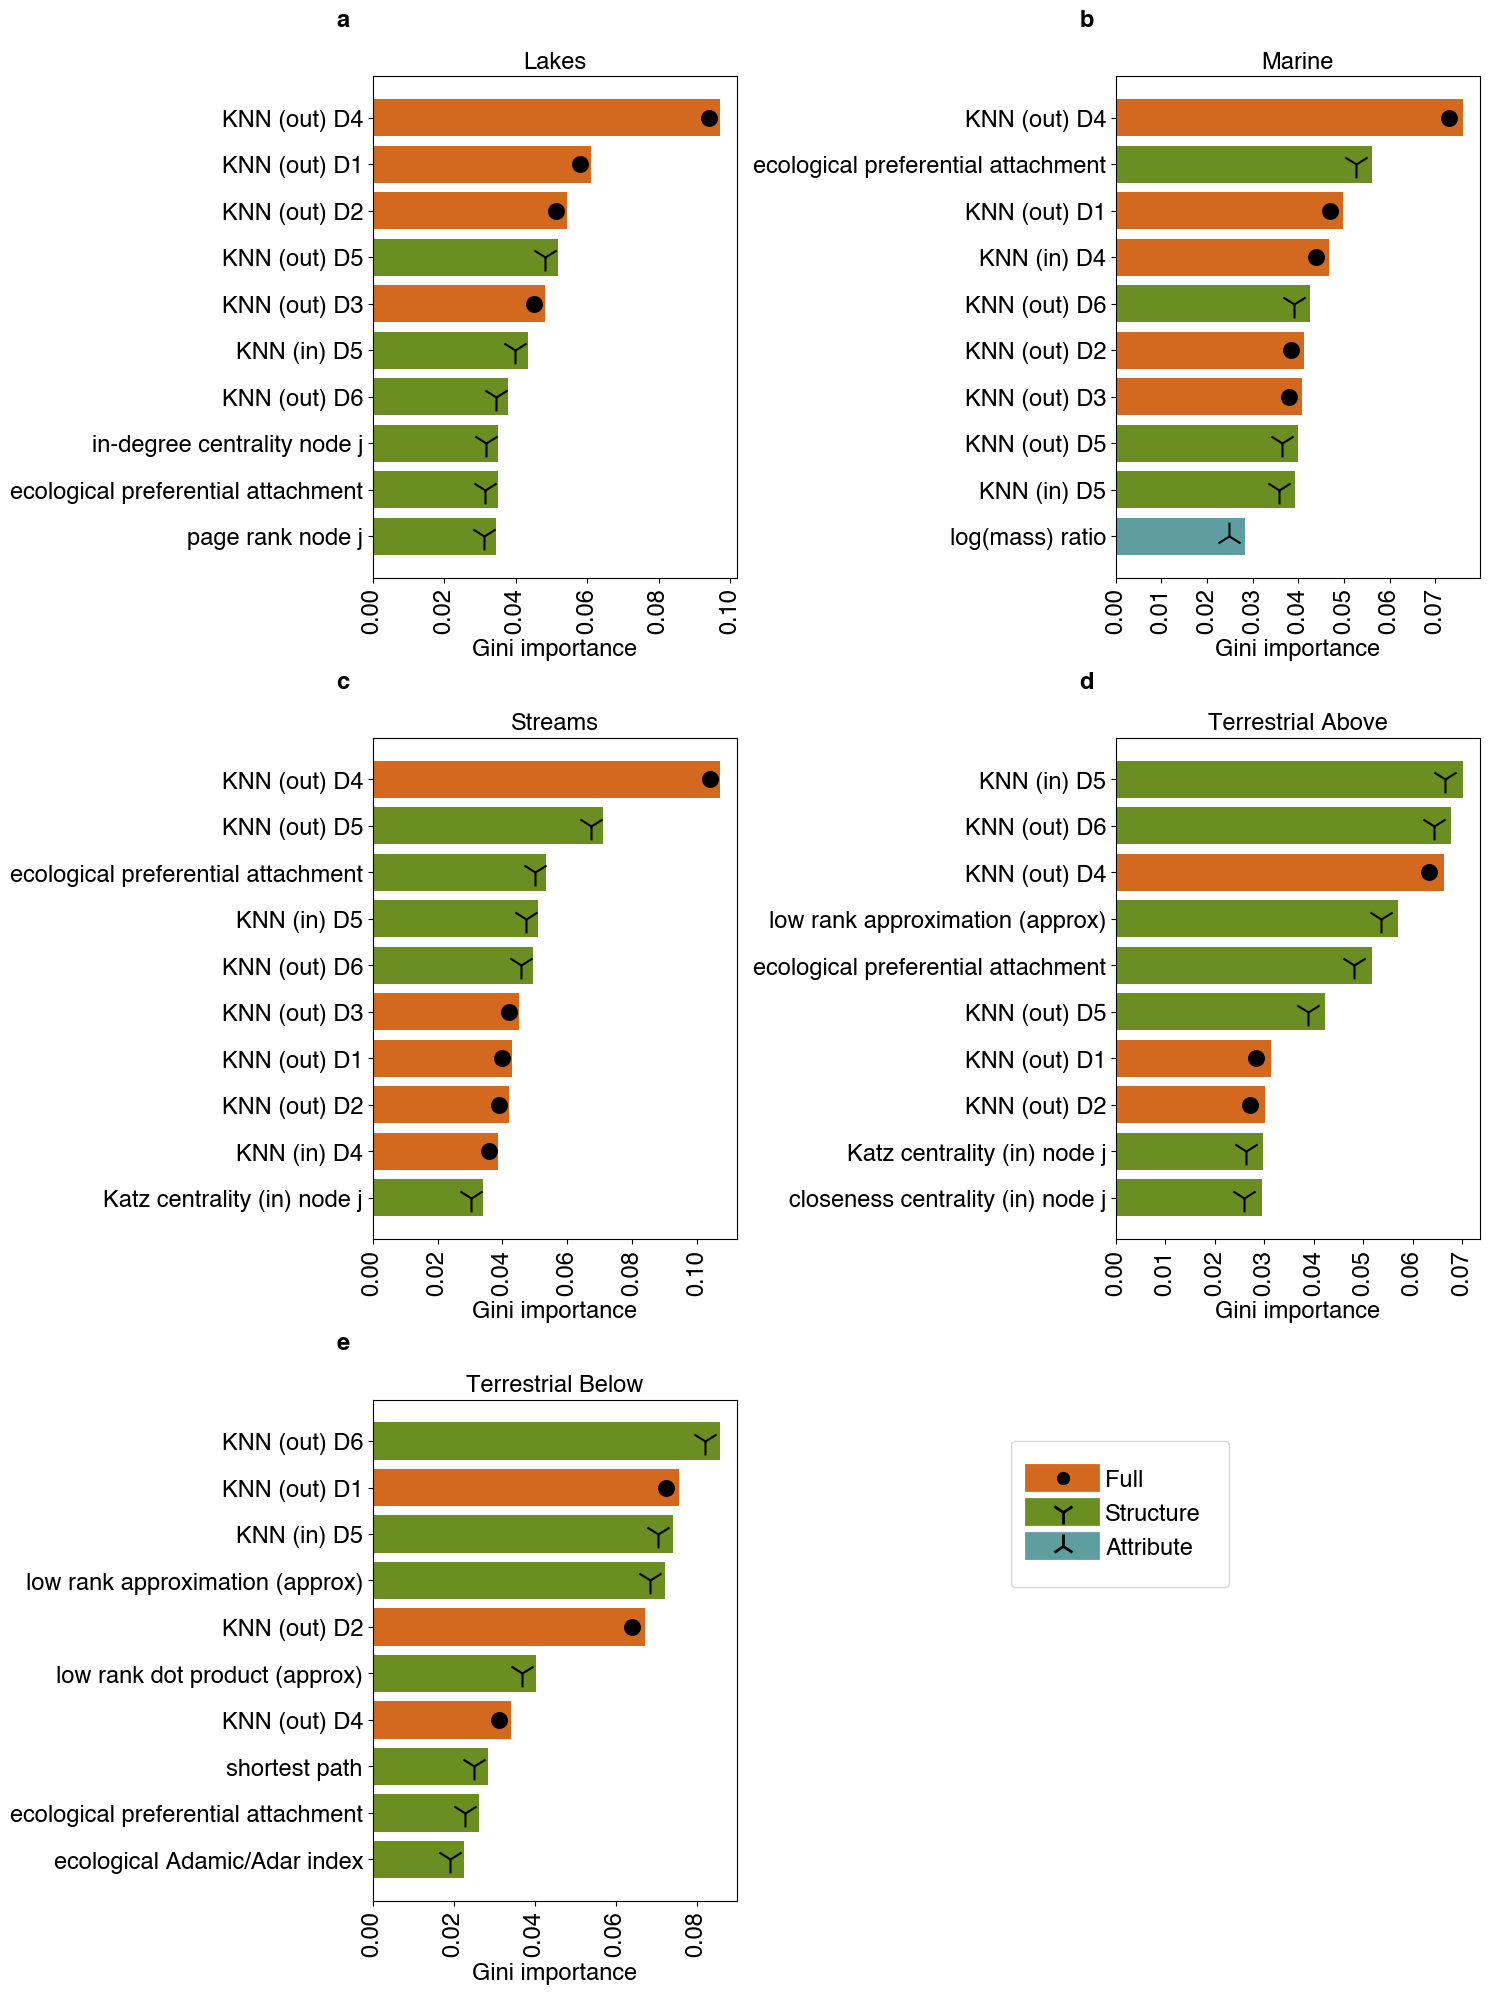

feature  importance
0                   KNN-out-D4    0.006415
1                    KNN-in-D5    0.002093
2                   KNN-out-D5    0.000836
3                   KNN-out-D6    0.000713
4               log_mass_ratio    0.000444
..                         ...         ...
89                        CCIj   -0.000227
90  met_endotherm_vertebrate_j   -0.000250
91                        PRDj   -0.000263
92                        KCIj   -0.000280
93                        DCIj   -0.000324

[94 rows x 2 columns]

feature  importance
0           KNN-out-D4    0.001739
1           KNN-out-D6    0.001131
2            KNN-in-D5    0.001095
3       log_mass_ratio    0.000903
4                  EPA    0.000817
..                 ...         ...
95  met_invertebrate_i   -0.000057
96                DCIj   -0.000075
97          KNN-out-D3   -0.000089
98                KCIj   -0.000098
99          KNN-out-D2   -0.000120

[100 rows x 2 columns]

feature  importance
0          EPA    0.007156
1   KNN-out-D4    0.005828
2    KNN-in-D5    0.001367
3   KNN-out-D6    0.001301
4   LRA-approx    0.000504
..         ...         ...
93        ECIj   -0.000354
94        PRDj   -0.000445
95        CCIj   -0.000519
96        DCIj   -0.000686
97        KCIj   -0.000738

[98 rows x 2 columns]

feature  importance
0   KNN-out-D6    0.006838
1    KNN-in-D5    0.006492
2   LRA-approx    0.004337
3   KNN-out-D4    0.003470
4   KNN-out-D5    0.001509
..         ...         ...
93         EPA   -0.000306
94        PRDj   -0.000339
95        CCIj   -0.000380
96        DCIj   -0.000403
97        KCIj   -0.000444

[98 rows x 2 columns]

feature  importance
0   KNN-out-D6    0.002362
1   LRA-approx    0.001591
2   KNN-out-D4    0.001253
3    KNN-in-D5    0.001036
4   KNN-out-D5    0.000814
..         ...         ...
89         EPA   -0.000167
90         EJC   -0.000168
91        PPRD   -0.000173
92         EAA   -0.000178
93      cosine   -0.000187

[94 rows x 2 columns]

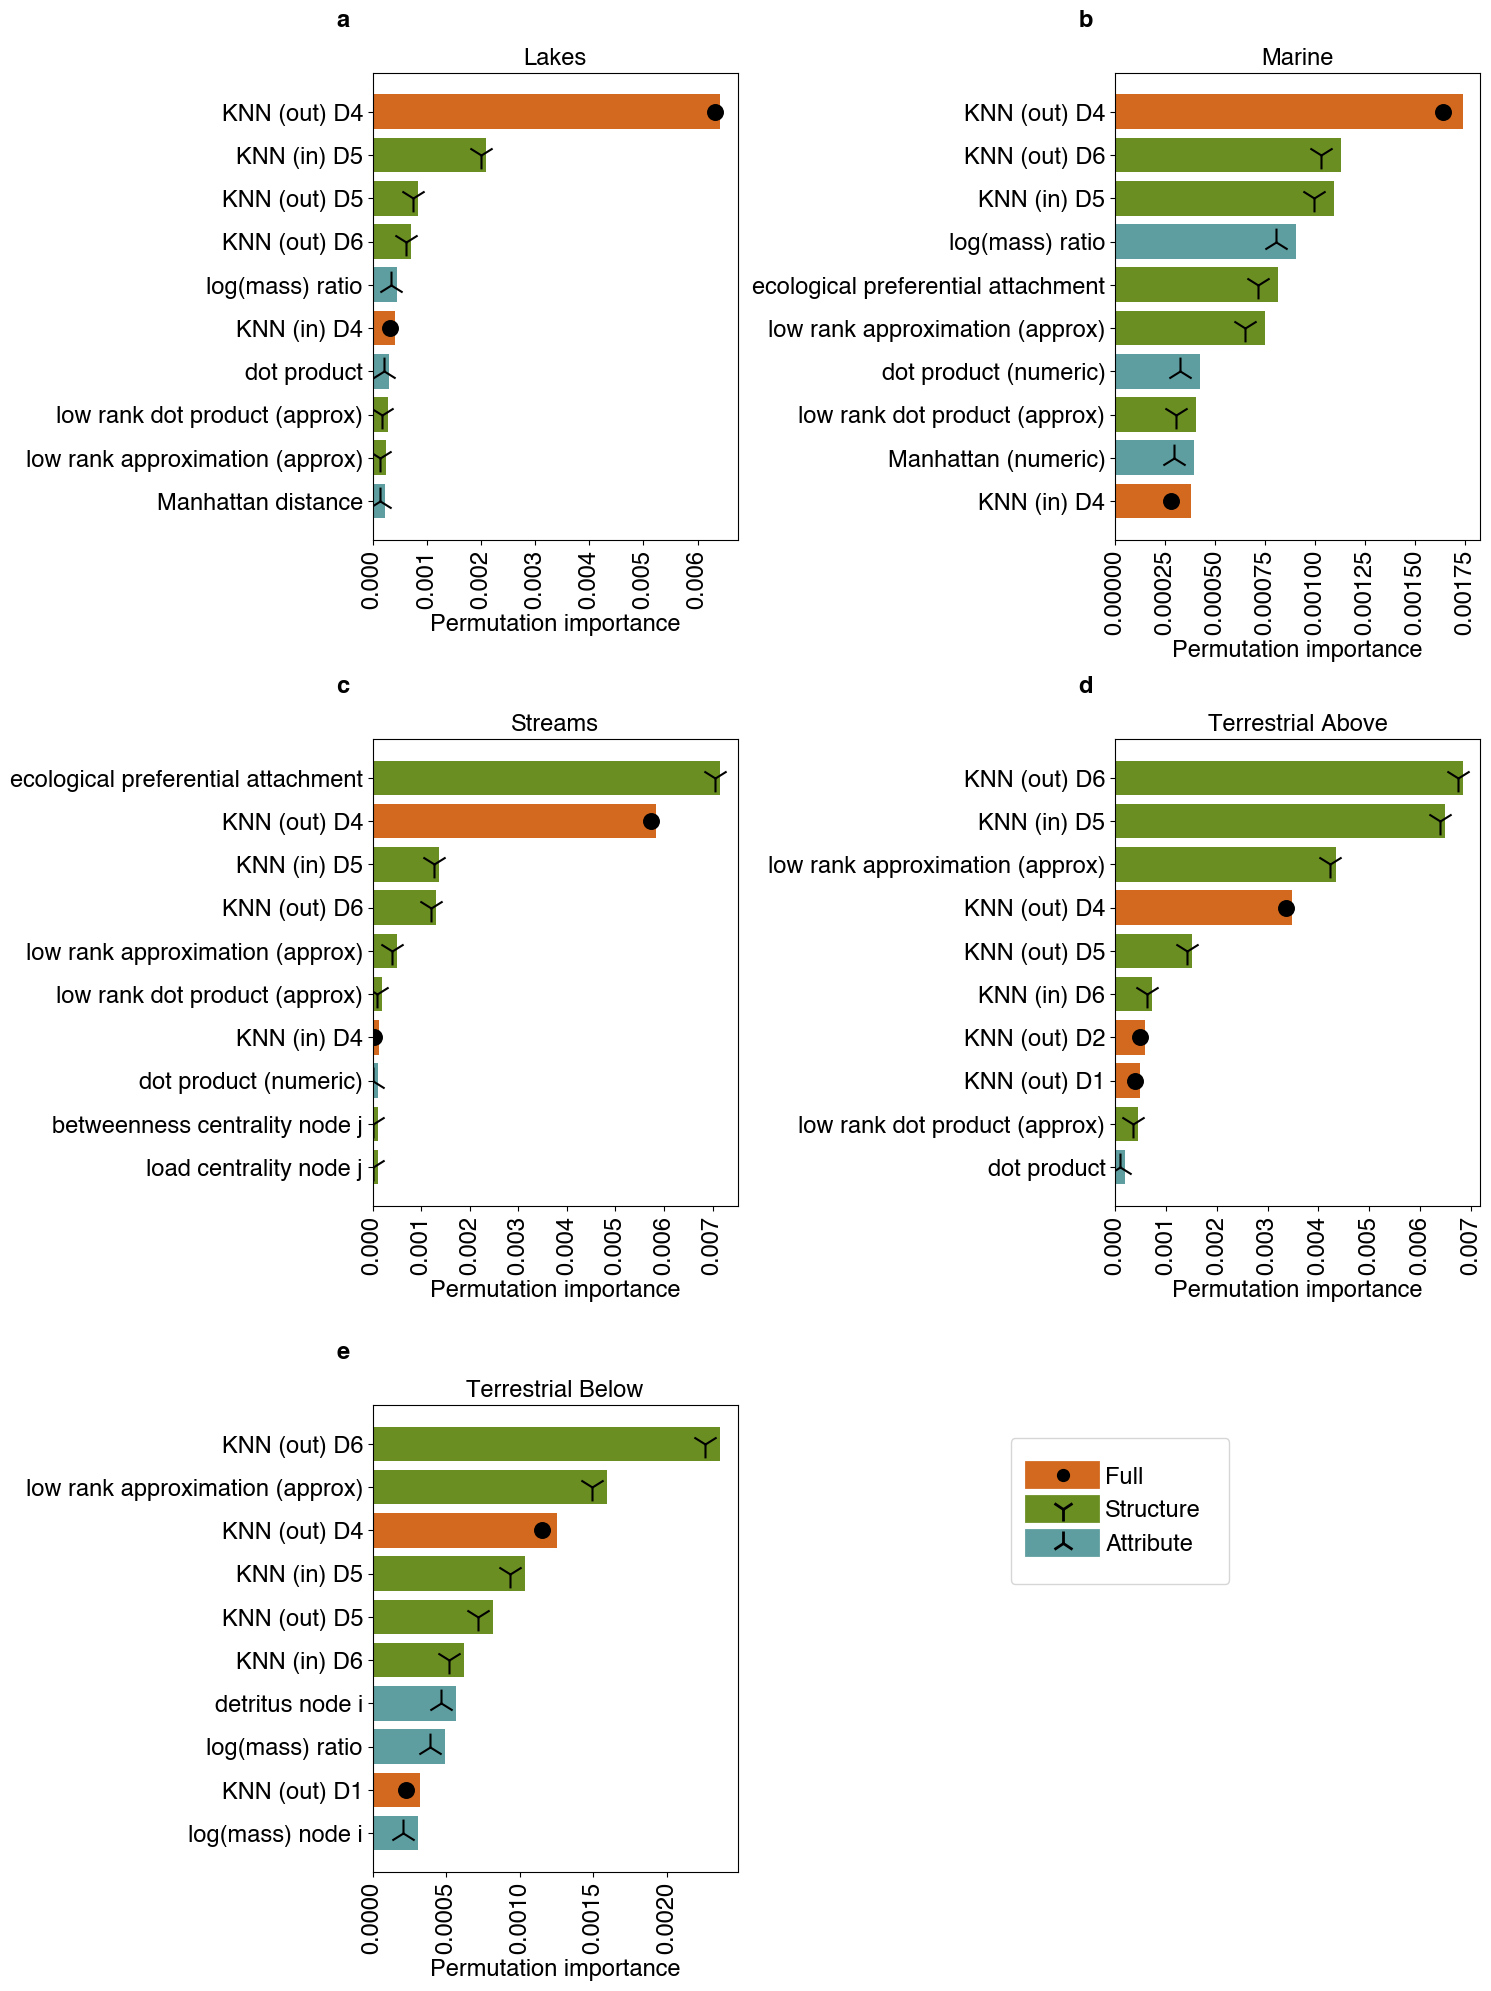

In [16]:
fig, ha = plt.subplots(3, 2, figsize=(15,20))
i = 1
for eco_type in ['lakes', 'marine','streams','terrestrial_above','terrestrial_below']:
    plt.subplot(3,2,i)
    visualize_importance(os.path.join('Summarized_Results',f'feature_importance_gini_aggregated_{eco_type}_overall.csv'),\
                         all_feats,'Gini importance', 10, True, eco_type.title().replace('_',' '), FONT_SIZE2, [0.0035,0.003,0.0035],\
                         -0.35, True, False, 400, full_color, struc_color, attr_color, feature_types, display_dict)
    i+=1
ha[-1,-1].axis('off')
for n, ax in enumerate(ha.flat[0:5]):
    ax.text(-0.1, 1.1, string.ascii_lowercase[n], transform=ax.transAxes, size=FONT_SIZE2, weight='bold')
legend_elements = [Line2D([0], [0], linewidth=20, marker='.', markersize=17,color=full_color, mfc='k', mec='k', label='Full'),
       Line2D([0], [0], linewidth=20, marker='1', markersize=17, markeredgewidth=2, color=struc_color, mfc='k', mec='k',label='Structure'),
       Line2D([0], [0], linewidth=20, marker='2', markersize=17, markeredgewidth=2, color=attr_color, mfc='k', mec='k',label='Attribute')]
fig.legend(handles=legend_elements, loc='lower center', ncol=1, bbox_to_anchor=(0.75,0.2), fontsize=FONT_SIZE2, borderpad=1.2)
plt.tight_layout()
plt.savefig(f'Figures/Gini_importance_ecotype.pdf',dpi=1000,bbox_inches='tight')
plt.show()

i = 1
fig, ha = plt.subplots(3, 2, figsize=(15,20))
for eco_type in ['lakes', 'marine','streams','terrestrial_above','terrestrial_below']:
    plt.subplot(3,2,i)
    visualize_importance(os.path.join('Summarized_Results',f'feature_importance_perm_aggregated_{eco_type}_overall.csv'),\
                         all_feats,'Permutation importance', 10, True, eco_type.title().replace('_',' '), FONT_SIZE2, [0.0001,0.0001,0.0001],\
                         -0.4, True, False, 400, full_color, struc_color, attr_color, feature_types, display_dict)
    i+=1
ha[-1,-1].axis('off')
for n, ax in enumerate(ha.flat[0:5]):
    ax.text(-0.1, 1.1, string.ascii_lowercase[n], transform=ax.transAxes, size=FONT_SIZE2, weight='bold')
legend_elements = [Line2D([0], [0], linewidth=20, marker='.', markersize=17,color=full_color, mfc='k', mec='k', label='Full'),
       Line2D([0], [0], linewidth=20, marker='1', markersize=17, markeredgewidth=2, color=struc_color, mfc='k', mec='k',label='Structure'),
       Line2D([0], [0], linewidth=20, marker='2', markersize=17,markeredgewidth=2, color=attr_color, mfc='k', mec='k',label='Attribute')]
fig.legend(handles=legend_elements, loc='lower center', ncol=1, bbox_to_anchor=(0.75,0.2), fontsize=FONT_SIZE2, borderpad=1.2)
plt.tight_layout()
plt.savefig(f'Figures/Perm_importance_ecotype.pdf',dpi=1000,bbox_inches='tight')
plt.show()